In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [5]:
dataset  = pd.read_csv(r'~/Desktop/tech/data/data.csv')
len(dataset)
dataset.shape
dataset

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# GETTING STATISTICAL OVERVIEW
dataset.describe()

,Row,Id,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# to find the mean attributes of the customers who churn and do not churn
summary_churn = dataset.groupby('Exited')
summary_churn.mean()
# we do not need to focus on columns such as ID and Row

,Row,Id,Score,Age,Tenure,Balance,Products,Card,Active,Salary
Exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [8]:
# to find the median attributes of the customers who churn and do not churn
summary_churn.median()

,Row,Id,Score,Age,Tenure,Balance,Products,Card,Active,Salary
Exited,,,,,,,,,,
0,5042.0,15691543.0,653.0,36.0,5.0,92072.68,2.0,1.0,1.0,99645.04
1,4871.0,15688963.0,646.0,45.0,5.0,109349.29,1.0,1.0,0.0,102460.84


In [9]:
# BUILDING CORRELATION PLOT/MATRIX to understand the correlation betweeen features

list(dataset.columns)

['Row',
 'Id',
 'Surname',
 'Score',
 'Nationality',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'Products',
 'Card',
 'Active',
 'Salary',
 'Exited']

In [10]:
newtable = dataset.drop(columns=['Row','Id', 'Surname', 'Nationality', 'Gender', 'Card', 'Active', 'Exited'], axis = 1)

In [11]:
newtable

,Score,Age,Tenure,Balance,Products,Salary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64
9996,516,35,10,57369.61,1,101699.77
9997,709,36,7,0.00,1,42085.58
9998,772,42,3,75075.31,2,92888.52


,Score,Age,Tenure,Balance,Products,Salary
Score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
Products,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
Salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


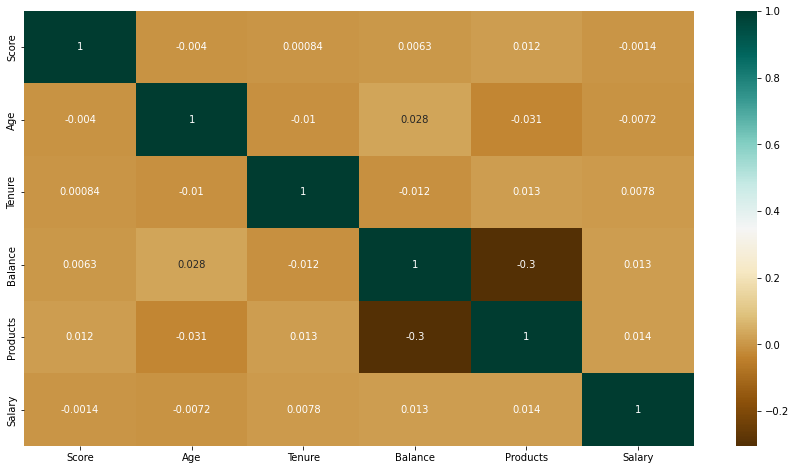

In [12]:
corr = newtable.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap='BrBG' )
corr

/home/ch/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ch/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ch/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

Text(0, 0.5, 'No of Customers')

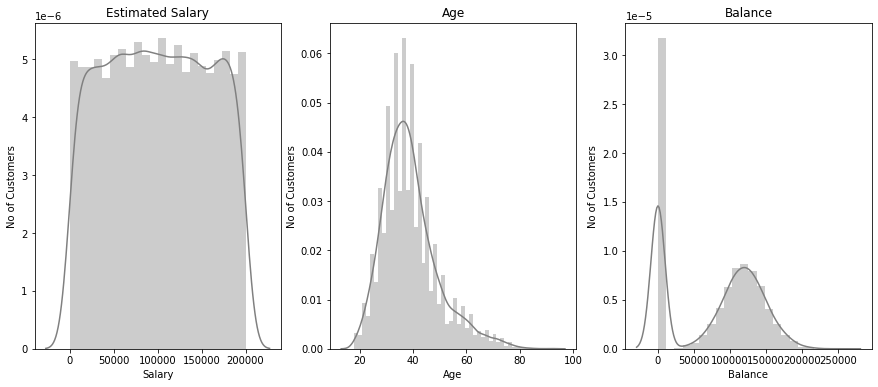

In [13]:
# EXPLORATORY DATA ANALYSIS

#Univariate Analysis
f, axes = plt.subplots(ncols=3, figsize=(15,6) )

sns.distplot(newtable.Salary, kde=True, color='Gray', ax = axes[0]).set_title('Estimated Salary')
axes[0].set_ylabel('No of Customers')

sns.distplot(newtable.Age, kde=True, color='Gray', ax = axes[1]).set_title('Age')
axes[1].set_ylabel('No of Customers')

sns.distplot(newtable.Balance, kde=True, color='Gray', ax = axes[2]).set_title('Balance')
axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer Geography Distribution')

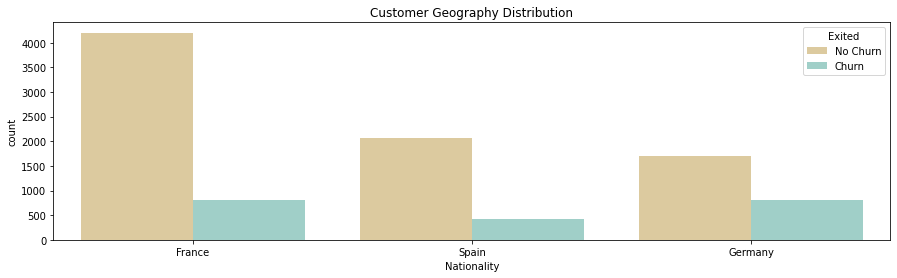

In [14]:


# Nationality vs Churn
plt.figure(figsize=(15,4))
p = sns.countplot(x='Nationality', hue='Exited', data=dataset, palette='BrBG')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

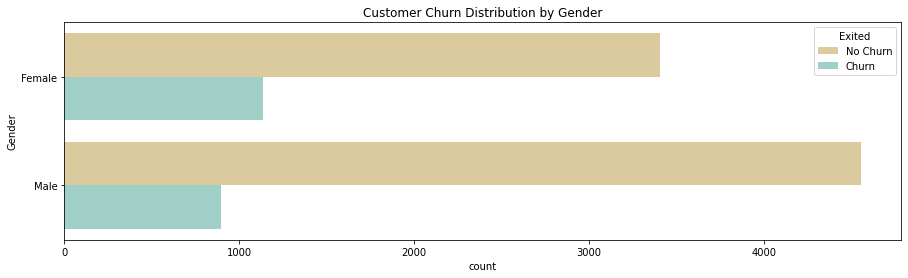

In [15]:
# Gender vs Churn
plt.figure(figsize=(15,4))
p=sns.countplot(y="Gender", hue='Exited', data=dataset, palette="BrBG")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Customer Distribution by Product')

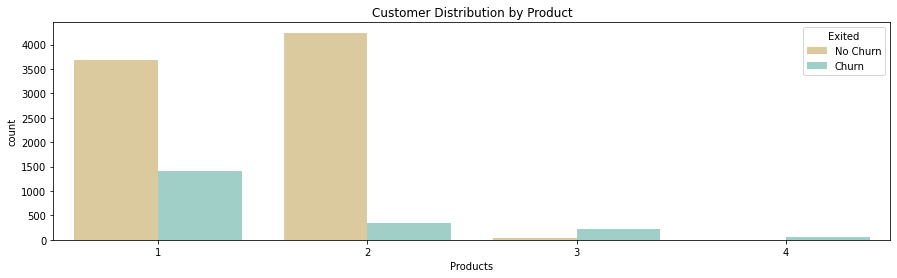

In [19]:
# number of products vs churn

plt.figure(figsize=(15,4))
p=sns.countplot(x='Products', hue='Exited', data=dataset, palette="BrBG")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Distribution by Product')

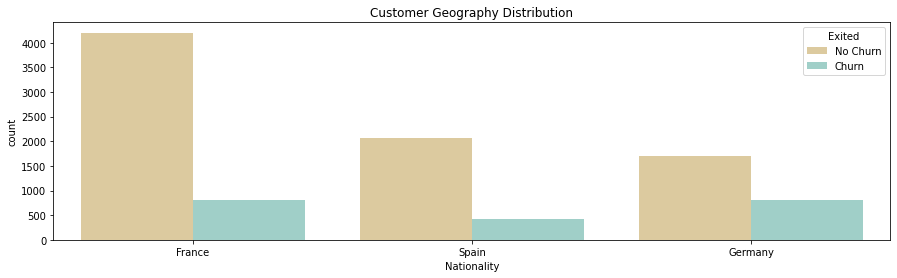

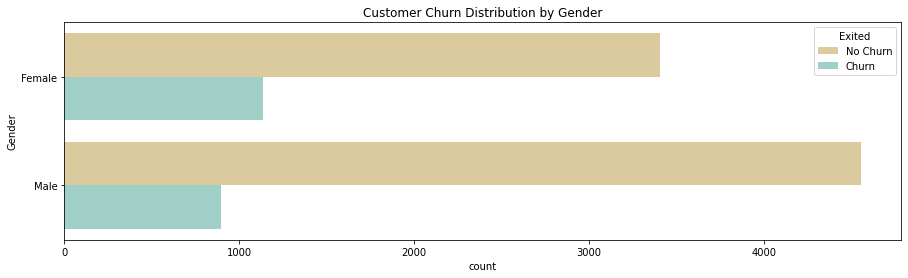

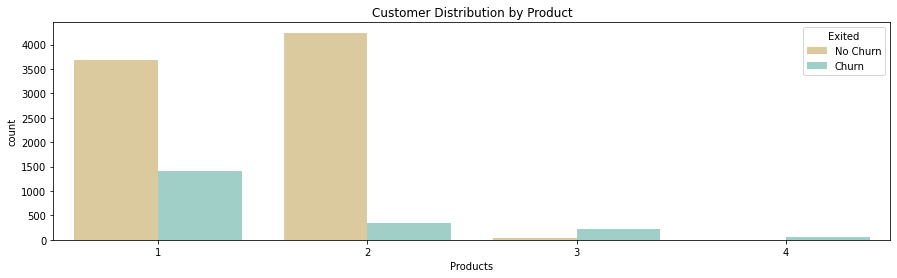

In [27]:
# Bivariate analyis of different features w.r.t to the Churn feature

# Nationality vs Churn
plt.figure(figsize=(15,4))
p = sns.countplot(x='Nationality', hue='Exited', data=dataset, palette='BrBG')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Geography Distribution')


# Gender vs Churn
plt.figure(figsize=(15,4))
p=sns.countplot(y="Gender", hue='Exited', data=dataset, palette="BrBG")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender')


# number of products vs churn
plt.figure(figsize=(15,4))
p=sns.countplot(x='Products', hue='Exited', data=dataset, palette="BrBG")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Distribution by Product')


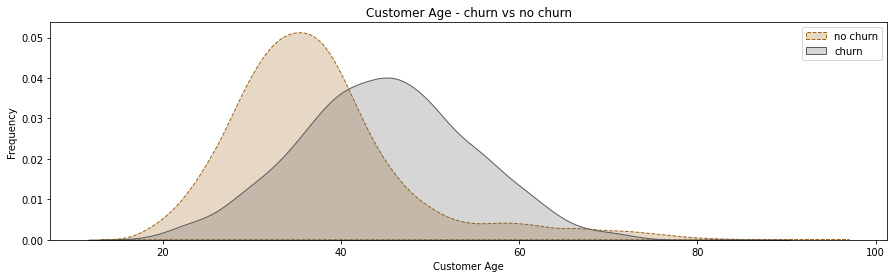

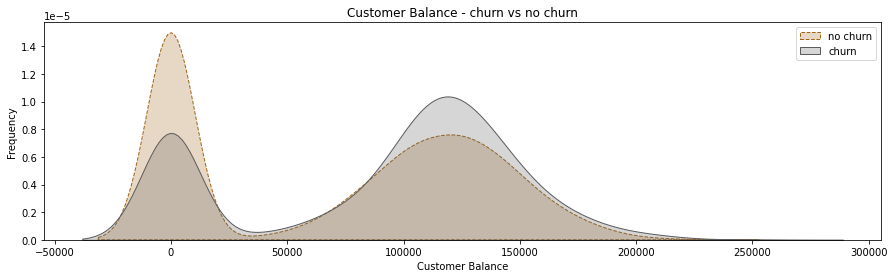

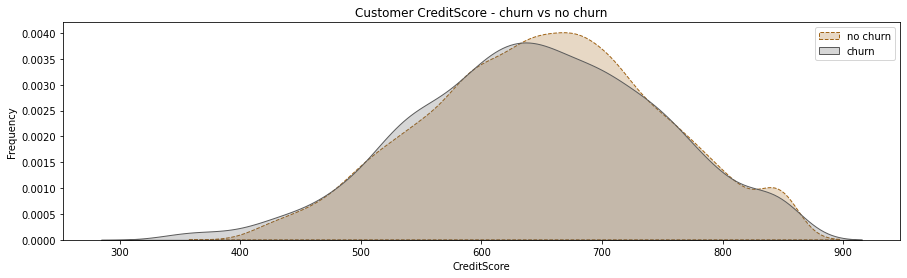

In [33]:

# Age vs churn
plt.figure(figsize=(15,4))
ax=sns.kdeplot(dataset.loc[(dataset['Exited'] == 0),'Age'], color=sns.color_palette("BrBG")[0], shade=True,label='no churn', linestyle='--')
ax=sns.kdeplot(dataset.loc[(dataset['Exited'] == 1),'Age'] , color=sns.color_palette("Greys_r")[1], shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')
plt.legend()

# Balance vs Churn
plt.figure(figsize=(15,4))
ax=sns.kdeplot(dataset.loc[(dataset['Exited'] == 0),'Balance'], color=sns.color_palette("BrBG")[0], shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(dataset.loc[(dataset['Exited'] == 1),'Balance'] , color=sns.color_palette("Greys_r")[1], shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')
plt.legend()

# Credit Score vs Churn
plt.figure(figsize=(15,4))
ax=sns.kdeplot(dataset.loc[(dataset['Exited'] == 0),'Score'], color=sns.color_palette("BrBG")[0], shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(dataset.loc[(dataset['Exited'] == 1),'Score'] , color=sns.color_palette("Greys_r")[1], shade=True, label='churn')
ax.set(xlabel='CreditScore', ylabel='Frequency')
plt.title('Customer CreditScore - churn vs no churn')
plt.legend()


# Similar to this multivariate analysis can also be performed where we can see the relationship of two separate variables with respect to churn